In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():        
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla K80


In [ ]:
!pip uninstall pytorch-pretrained-bert pytorch-nlp

Found existing installation: pytorch-pretrained-bert 0.6.2
Uninstalling pytorch-pretrained-bert-0.6.2:
  Would remove:
    /usr/local/bin/pytorch_pretrained_bert
    /usr/local/lib/python3.7/dist-packages/.DS_Store
    /usr/local/lib/python3.7/dist-packages/pytorch_pretrained_bert-0.6.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pytorch_pretrained_bert/*
Proceed (y/n)? y
  Successfully uninstalled pytorch-pretrained-bert-0.6.2
Found existing installation: pytorch-nlp 0.5.0
Uninstalling pytorch-nlp-0.5.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/pytorch_nlp-0.5.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/torchnlp/*
Proceed (y/n)? y
  Successfully uninstalled pytorch-nlp-0.5.0


In [ ]:
!pip install pytorch-pretrained-bert pytorch-nlp

  Using cached pytorch_pretrained_bert-0.6.2-py3-none-any.whl (123 kB)
  Using cached pytorch_nlp-0.5.0-py3-none-any.whl (90 kB)


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving df_convote_train.csv to df_convote_train.csv


In [ ]:
from google.colab import files
uploaded = files.upload()



Saving df_convote_test.csv to df_convote_test.csv


In [ ]:
 pip install awscli --ignore-installed six

     |████████████████████████████████| 3.8 MB 12.8 MB/s 
     |████████████████████████████████| 547 kB 42.6 MB/s 
     |████████████████████████████████| 636 kB 46.6 MB/s 
  Using cached botocore-1.23.4-py3-none-any.whl (8.1 MB)
  Using cached s3transfer-0.5.0-py3-none-any.whl (79 kB)
  Using cached urllib3-1.26.7-py2.py3-none-any.whl (138 kB)
     |████████████████████████████████| 247 kB 40.8 MB/s 
  Using cached jmespath-0.10.0-py2.py3-none-any.whl (24 kB)
     |████████████████████████████████| 77 kB 5.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.7 which is incompatible.
google-colab 1.0.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albume

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pytorch_pretrained_bert import BertTokenizer, BertConfig
from pytorch_pretrained_bert import BertAdam, BertForSequenceClassification
from tqdm import tqdm, trange
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [ ]:

train_data = pd.read_csv('df_convote_train.csv')
test_data = pd.read_csv('df_convote_test.csv')

In [ ]:
text_data = train_data.text.values
text_data = ["[CLS] " + text + " [SEP]" for text in text_data]
labels = train_data.political_party.values

In [ ]:

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

tokenized_texts = [tokenizer.tokenize(text)[:512] for text in text_data]
print ("Tokenize the first sentence:")
print (tokenized_texts[0])

100%|██████████| 231508/231508 [00:00<00:00, 697867.00B/s]


Tokenize the first sentence:
['[CLS]', 'mr', 'speaker', 'i', 'rise', 'in', 'opposition', 'to', 'the', 'rules', 'package', 'that', 'we', 'have', 'before', 'us', 'today', 'it', 'is', 'outrageous', 'that', 'my', 'republican', 'colleagues', 'have', 'placed', 'before', 'us', 'a', 'rules', 'package', 'that', 'at', 'best', 'lacks', 'integrity', 'and', 'at', 'worst', 'is', 'completely', 'une', '##thic', '##al', 'as', 'the', 'highest', 'body', 'of', 'elected', 'officials', 'in', 'our', 'country', 'we', 'should', 'be', 'held', 'to', 'the', 'highest', 'ethical', 'standards', 'but', 'instead', 'my', 'republican', 'colleagues', 'have', 'opted', 'to', 'put', 'before', 'us', 'a', 'rules', 'package', 'that', 'actually', 'lowers', 'our', 'ethics', 'standards', 'so', 'that', 'they', 'may', 'promote', 'their', 'own', 'agenda', 'at', 'whatever', 'cost', 'this', 'rules', 'package', 'makes', 'it', 'far', 'more', 'difficult', 'for', 'ethics', 'investigations', 'to', 'take', 'place', 'by', 'requiring', 'a', '

In [ ]:
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]

In [ ]:
input_ids = pad_sequences(input_ids, maxlen=512, dtype="long", truncating="post", padding="post")

In [ ]:
# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask)

In [ ]:
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=2018, test_size=0.1)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2018, test_size=0.1)

In [ ]:

train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [ ]:
batch_size = 4



train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
model.cuda()

100%|██████████| 407873900/407873900 [00:14<00:00, 28108737.62B/s]


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): BertLayerNorm()
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): BertLayerNorm()
              (dropout): Dropout(p=0.1, inplace=False)
   

In [ ]:
param_optimizer = list(model.named_parameters())
no_decay = ['beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]




In [ ]:
optimizer = BertAdam(optimizer_grouped_parameters,
                     lr=2e-5,
                     warmup=.1)

t_total value of -1 results in schedule not being applied


In [ ]:
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)
        

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)
  

'Tesla K80'

In [ ]:
t = [] 

train_loss_set = []


epochs = 1    #Set to 1 to avoid CUDA out of memory issue

for _ in trange(epochs, desc="Epoch"):
  
  
  # Training

  model.train()
  

  tr_loss = 0
  nb_tr_examples, nb_tr_steps = 0, 0
  
  # Train the data for one epoch
  for step, batch in enumerate(train_dataloader):
  
    batch = tuple(t.to(device) for t in batch)

    b_input_ids, b_input_mask, b_labels = batch
    
    optimizer.zero_grad()
    # Forward propogation
    loss = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
    train_loss_set.append(loss.item())    
    # Backward propogation
    loss.backward()
    optimizer.step()
    
    
    # Update tracking variables
    tr_loss += loss.item()
    nb_tr_examples += b_input_ids.size(0)
    nb_tr_steps += 1

  print("Train loss: {}".format(tr_loss/nb_tr_steps))
    
    
  # Validation

  model.eval()

  # Tracking variables 
  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0

  # Evaluate data for one epoch
  for batch in validation_dataloader:

    batch = tuple(t.to(device) for t in batch)

    b_input_ids, b_input_mask, b_labels = batch
    
    with torch.no_grad():

      logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
    
  
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    tmp_eval_accuracy = flat_accuracy(logits, label_ids)
    
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1

  print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/pytorch_pretrained_bert/optimization.py:275: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  ../torch/csrc/utils/python_arg_parser.cpp:1050.)
  next_m.mul_(beta1).add_(1 - beta1, grad)


Train loss: 0.701281241476068


Epoch: 100%|██████████| 1/1 [21:17<00:00, 1277.31s/it]

Validation Accuracy: 0.5017605633802817


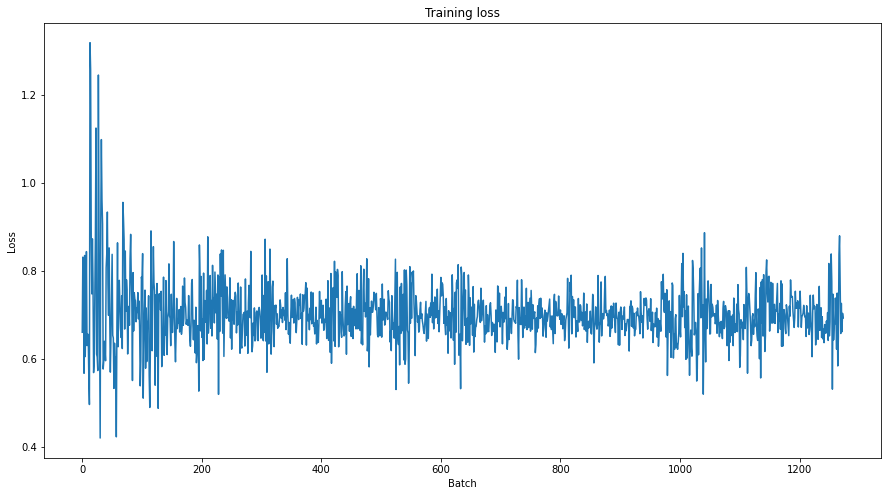

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(train_loss_set)
plt.show()

In [ ]:
test_data = test_data.text.values



In [ ]:
labels_test = 

,Unnamed: 0,text,bill_debate_number,political_party,mentioned_bill,voted_yes
0,0,mr chairman i thank the gentleman from michiga...,48,0,0,0
1,1,mr chairman i thank the gentleman for yielding...,48,0,0,0
2,2,mr chairman i rise in opposition to hr 27 the ...,48,0,1,0
3,3,mr chairman i rise today in support of hr 27 t...,48,1,1,1
4,4,mr speaker by direction of the committee on ru...,48,1,0,1


In [ ]:
labels_test = test_data.political_party.values

# We need to add special tokens at the beginning and end of each sentence for BERT to work properly
test_data = ["[CLS] " + data + " [SEP]" for data in test_data]


tokenized_texts = [tokenizer.tokenize(data)[:512] for data in test_data]


MAX_LEN = 512

# Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask) 

prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(labels_test)
  
batch_size = 4


prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

NameError: ignored

In [ ]:
# Prediction on test set


model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)

  b_input_ids, b_input_mask, b_labels = batch

  with torch.no_grad():
  
    logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)

  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)